In [2]:
from utils.imutil import *
from utils.mosaic import *
from utils.progress import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [3]:
descriptors = np.load('../data/openface+microsoft/npy32/openface-descriptors.npy')
images = np.load('../data/openface+microsoft/npy32/images.npy')

In [4]:
nbrs = NearestNeighbors(n_neighbors=8).fit(descriptors)

In [5]:
def job(task):
    distances, kn = nbrs.kneighbors([descriptors[task]])
    distances = distances.reshape(-1)
    kn = kn.reshape(-1)
    return distances, kn

exact_nearest_neighbors = progress_parallel(job, range(1000))

1000 0:00:14 70.45/s


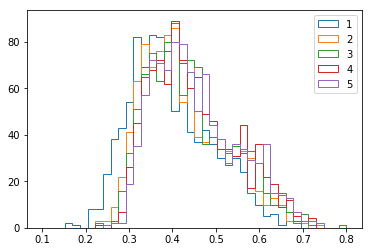

In [6]:
for i in range(1,6):
    top_distances = [distances[i] for distances, kn in exact_nearest_neighbors]
    plt.hist(top_distances, bins=40, histtype='step', label=str(i), range=(0.1,0.8))
plt.legend()
plt.show()

[0.         0.18271172]
[111403 111410]


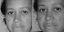

skipped 6


In [22]:
total = 0
skipped = 0
threshold = 0.2
while total < 1:
    i = np.random.randint(0, len(images))
    distances, kn = nbrs.kneighbors([descriptors[i]])
    kn = kn.reshape(-1)
    distances = distances.reshape(-1)
    near = np.sum(distances < threshold)
    if near < 2:
        skipped += 1
        continue
    print(distances[:near])
    print(kn[:near])
    imshow(make_mosaic(images[kn[:near]], ny=1), zoom=4)
    total += 1

print('skipped', skipped)